# Projet: La reconnaissance des émotions faciales

## Chargement des données

Pour notre projet de classification d'images basé sur l'émotion, nous avons soigneusement organisé notre base de données en trois dossiers principaux : **entraînement**, **validation** et **test**. Chacun de ces dossiers principaux contient cinq sous-dossiers correspondant aux émotions ciblées : *happy*, *sad*, *neutral*, *angry* et *shocked*.

Voici la répartition détaillée des images :

- **Entraînement** : Chaque sous-dossier d'émotion contient entre 390 à 410 images, fournissant une base robuste pour l'apprentissage de notre modèle.
- **Validation** : Pour affiner les réglages de notre modèle, chaque sous-dossier de validation inclut entre 45 à 55 images par émotion.
- **Test** : Pour évaluer la performance du modèle, chaque sous-dossier de test contient entre 45 à 55 images par émotion.

Nous avons choisi d'héberger notre base de données sur GitHub pour tirer profit de la rapidité du git clone depuis Google Colab, garantissant une intégration fluide et un accès simplifié à nos ressources, essentiel pour le développement rapide et efficace de notre projet.

In [5]:
IMAGE_SIZE = 128
CLASSES = ['happy', 'angry','schoked', 'sad'] # On peut ajouter la classe de 'neutral' à la liste des émotions
# Mais, on doit aussi modifier le paramètre de la dernière couche Dense pour refléter le nouveau nombre total de classes. 

In [4]:
import os

# Navigate to the home directory
home_directory = os.path.expanduser('~')
os.chdir(home_directory)

# Set the repository and directory to check
repo_name = "ProjectDL"
repo_url = f"https://:x-oauth-basic@github.com/lamzaid/{repo_name}"

# Check if the directory already exists and remove it if it does
if os.path.exists(repo_name):
    !rm -rf {repo_name}

# Clone the repository
!git clone {repo_url}

# Set the path to the data directory inside the cloned repo
path = f"./{repo_name}/data"
print(f"Data path is set to: {path}")

Clonage dans 'ProjectDL'...
remote: Enumerating objects: 2824, done.
remote: Counting objects: 100% (503/503), done.
remote: Compressing objects: 100% (500/500), done.
remote: Total 2824 (delta 4), reused 491 (delta 3), pack-reused 2321
Réception d'objets: 100% (2824/2824), 938.08 Mio | 2.38 Mio/s, fait.
Résolution des deltas: 100% (17/17), fait.
Mise à jour des fichiers: 100% (2543/2543), fait.
Data path is set to: ./ProjectDL/data


In [43]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train'):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + '/' +  dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, IMAGE_SIZE, IMAGE_SIZE, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + '/' + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + '/' + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + '/' + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

In [44]:
x_train, y_train = load_data(path, CLASSES, dataset='train')
x_train = x_train / 255
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, CLASSES, dataset='validation')
x_val=x_val/255
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, CLASSES, dataset='test')
x_test=x_test/255
print(x_test.shape, y_test.shape)

(1616, 128, 128, 3) (1616, 1)
(199, 128, 128, 3) (199, 1)
(199, 128, 128, 3) (199, 1)


C:\Users\taham\AppData\Local\Temp\ipykernel_23508\3348352387.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(CLASSES[int(y_train[shuffle_indices[i]])])


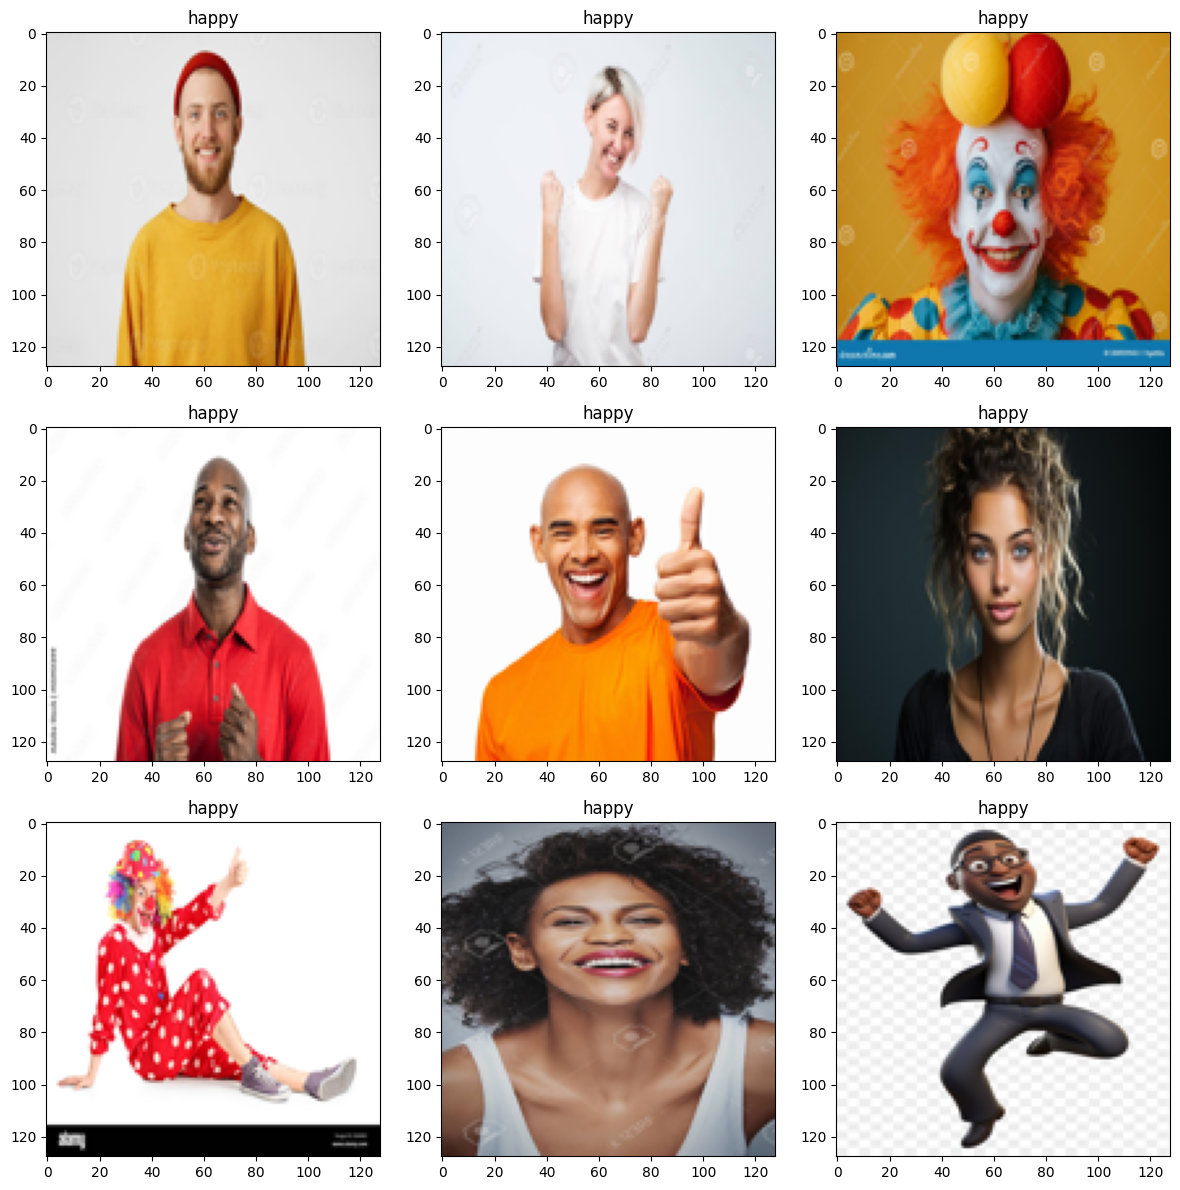

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(CLASSES[int(y_train[shuffle_indices[i]])])
    plt.imshow(image)

plt.tight_layout()
plt.show()

## Construction du Modèle de Réseau de Neurones Convolutif

Dans cette section, nous avons construit un modèle de réseau de neurones convolutif (CNN) en utilisant l'API Keras de TensorFlow. Le modèle est conçu pour traiter des images de dimensions `(IMAGE_SIZE, IMAGE_SIZE, 3)` et effectuer une classification en quatre classes.


In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()



# première couche de convolution
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))  

# deuxième couche de convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))


# troisième couche de convolution
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))


# quatrième couche de convolution
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Couche Dense Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))


c:\Users\taham\Desktop\ProjectDL-branchTest\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,547,364 (9.72 MB)

 Trainable params: 2,547,364 (9.72 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
from tensorflow.keras import optimizers

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=5e-4),
              metrics=['sparse_categorical_accuracy'])

In [49]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 1.3987 - sparse_categorical_accuracy: 0.2445 - val_loss: 1.3615 - val_sparse_categorical_accuracy: 0.3719
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 1.3315 - sparse_categorical_accuracy: 0.3518 - val_loss: 1.3502 - val_sparse_categorical_accuracy: 0.3116
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 1.2651 - sparse_categorical_accuracy: 0.4188 - val_loss: 1.3553 - val_sparse_categorical_accuracy: 0.3417
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 1.2144 - sparse_categorical_accuracy: 0.4618 - val_loss: 1.2903 - val_sparse_categorical_accuracy: 0.3618
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 1.1665 - sparse_categorical_accuracy: 0.4802 - val_loss: 1.2644 - val_sparse_categorical_accuracy: 0.4422
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 1.0918 - sparse_categorical_accuracy: 0.5184 - val_loss: 1.1623 - val_sparse_categorical_accuracy: 0.5226
Epoc

In [50]:
def plot_training_analysis():
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

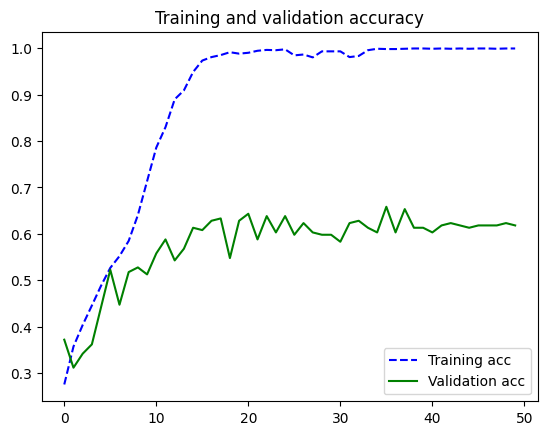

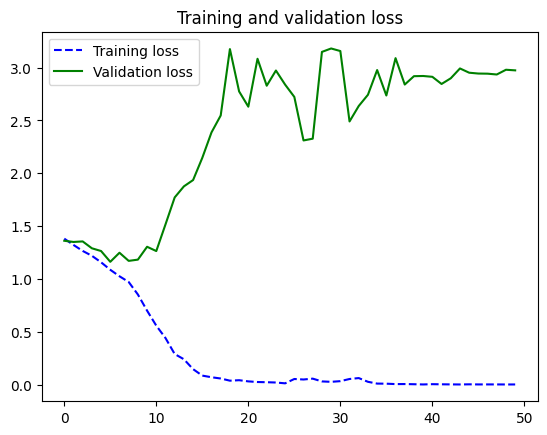

In [51]:
plot_training_analysis()

## Génération de Données
On a observé du surapprenstissage sur notre ancien modèle , une méthode pour remédier à ça c'est augmenter la base de données :
La génération de données (Data Generation) est une technique essentielle en apprentissage profond pour améliorer la performance des modèles. Elle permet d'augmenter la quantité de données d'entraînement disponibles en appliquant diverses transformations aux images originales. Ces transformations incluent la rotation, le zoom, le redimensionnement, la translation, et le retournement des images. L'objectif est de créer des variations des données d'entraînement afin de rendre le modèle plus robuste et capable de généraliser efficacement sur des données non vues.

En utilisant des générateurs de données, comme ceux fournis par Keras (`ImageDataGenerator`), on peut dynamiquement appliquer ces transformations pendant l'entraînement. Cela aide à réduire le surapprentissage (overfitting) et améliore la capacité du modèle à reconnaître les motifs dans des conditions variées. La génération de données est particulièrement utile lorsque l'on dispose d'un jeu de données d'entraînement limité.


In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
              
    rotation_range=10,            
    width_shift_range=0.2,       
    height_shift_range=0.2,       
    shear_range=0.15,             
    zoom_range=0.15,              
    horizontal_flip=True
)

C:\Users\taham\AppData\Local\Temp\ipykernel_23508\144115286.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(CLASSES[int(example_y[i])])


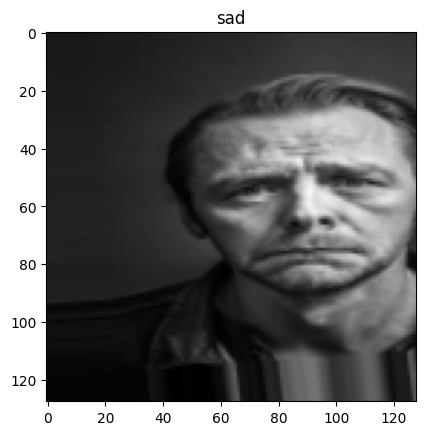

In [53]:
example_x, example_y = next(train_datagen.flow(x_train, y_train, batch_size=1))
for i in range(0,1):
    plt.imshow(example_x[i])
    plt.title(CLASSES[int(example_y[i])])
    plt.show()

In [54]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), activation='relu'))

model.add(MaxPooling2D(2, 2))
# 2ème couche
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# 3ème couche
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# 4ème couche
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())      
model.add(Dense(512, activation='relu'))   
model.add(Dense(4, activation='softmax'))  

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=5e-4),
              metrics=['sparse_categorical_accuracy'])

In [56]:
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32), 
                    validation_data=(x_val, y_val),
                    epochs=50,
                    )

Epoch 1/50


c:\Users\taham\Desktop\ProjectDL-branchTest\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 1.3811 - sparse_categorical_accuracy: 0.2622 - val_loss: 1.3410 - val_sparse_categorical_accuracy: 0.2965
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 1.2933 - sparse_categorical_accuracy: 0.3457 - val_loss: 1.3094 - val_sparse_categorical_accuracy: 0.4121
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 1.2906 - sparse_categorical_accuracy: 0.3837 - val_loss: 1.2907 - val_sparse_categorical_accuracy: 0.4121
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 1.2458 - sparse_categorical_accuracy: 0.4363 - val_loss: 1.2184 - val_sparse_categorical_accuracy: 0.4472
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 1.1982 - sparse_categorical_accuracy: 0.4266 - val_loss: 1.3153 - val_sparse_categorical_accuracy: 0.4523
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 1.2235 - sparse_categorical_accuracy: 0.4285 - val_loss: 1.3167 - val_sparse_categorical_accuracy: 0.4573
Epoch 7/50
51/5

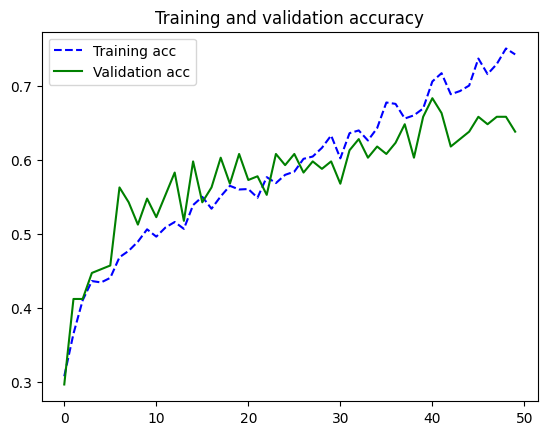

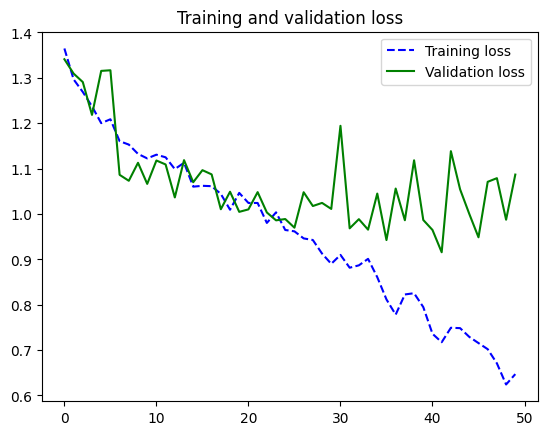

In [57]:
plot_training_analysis()

## Modèle VGG16

VGG16 est un modèle de réseau de neurones convolutifs (CNN) développé par le Visual Geometry Group (VGG) de l'Université d'Oxford. 
On va utilisé ce réseau pour mieux améliorer notre accuracy et limiter le sur apprentissage .
Dans un pemier temps en veut conserver les caractéristiques de notre réseau donc on fixe trainable a false .

In [58]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))


In [59]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

conv_base.trainable = False

# Build the model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))  
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(4, activation='softmax'))  

model.summary()


model.compile(optimizer=optimizers.Adam(learning_rate=3e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 750ms/step - accuracy: 0.3844 - loss: 1.4421 - val_accuracy: 0.5879 - val_loss: 0.9443
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 745ms/step - accuracy: 0.5947 - loss: 0.9900 - val_accuracy: 0.6734 - val_loss: 0.8180
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 758ms/step - accuracy: 0.6738 - loss: 0.8476 - val_accuracy: 0.6884 - val_loss: 0.8075
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 744ms/step - accuracy: 0.7252 - loss: 0.7548 - val_accuracy: 0.7286 - val_loss: 0.7297
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 765ms/step - accuracy: 0.7570 - loss: 0.6304 - val_accuracy: 0.7186 - val_loss: 0.7437
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 748ms/step - accuracy: 0.7977 - loss: 0.5660 - val_accuracy: 0.7437 - val_loss: 0.7052
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 744ms/step - accuracy: 0.8190 - loss: 0.4835 - val_accuracy: 0.7136 - val_loss: 0.7103
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 744ms/step - accuracy: 0.8511 - loss: 0.4395 - val_accu

On réalise maintenant le fine tuning en activant la fonction trainable pour pouvoir changer les poids pour qu'ils soient plus adaptées a notre projet

In [60]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

conv_base.trainable = True


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(4, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,
                   
                    validation_data=(x_val, y_val))

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.3269 - loss: 1.4392 - val_accuracy: 0.3568 - val_loss: 1.2089
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.4008 - loss: 1.2440 - val_accuracy: 0.5578 - val_loss: 1.0024
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4819 - loss: 1.1597 - val_accuracy: 0.6281 - val_loss: 0.9699
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.5166 - loss: 1.0790 - val_accuracy: 0.6231 - val_loss: 0.9306
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5693 - loss: 1.0199 - val_accuracy: 0.7035 - val_loss: 0.7617
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5771 - loss: 1.0216 - val_accuracy: 0.5980 - val_loss: 0.9326
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5521 - loss: 1.0165 - val_accuracy: 0.6332 - val_loss: 0.9111
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.5755 - loss: 0.9409 - val_accuracy: 0.7035 - v

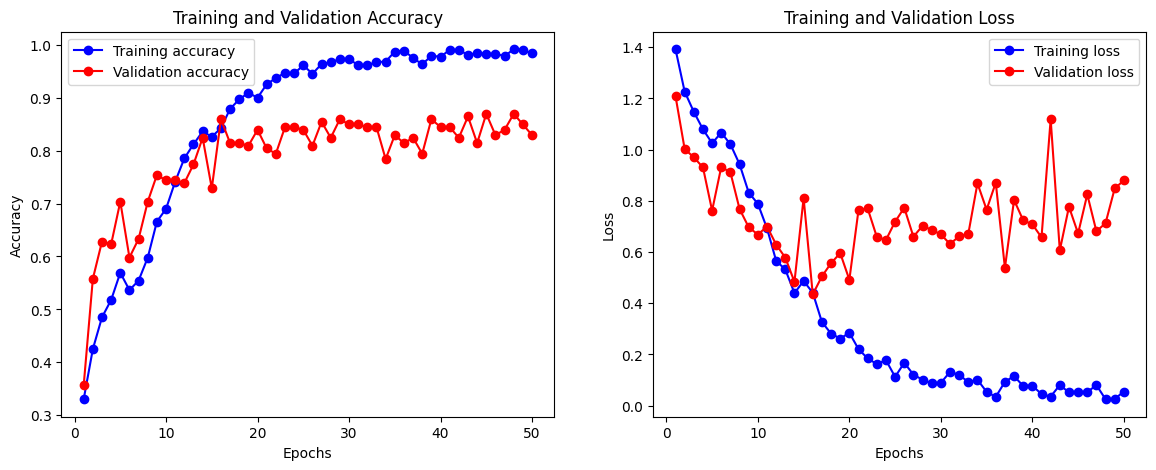

In [67]:
import matplotlib.pyplot as plt

def plot_training_analysis(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_analysis(history)


51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 593ms/step


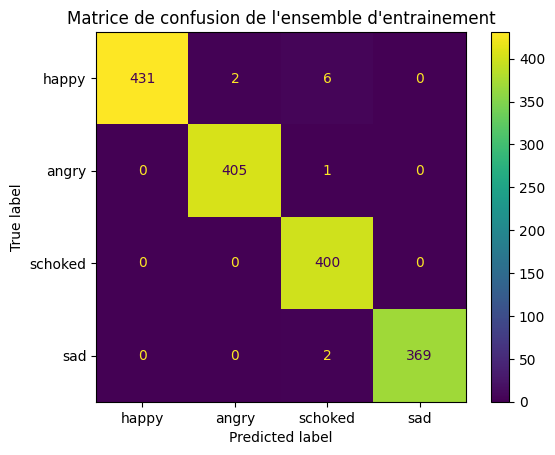

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 520ms/step


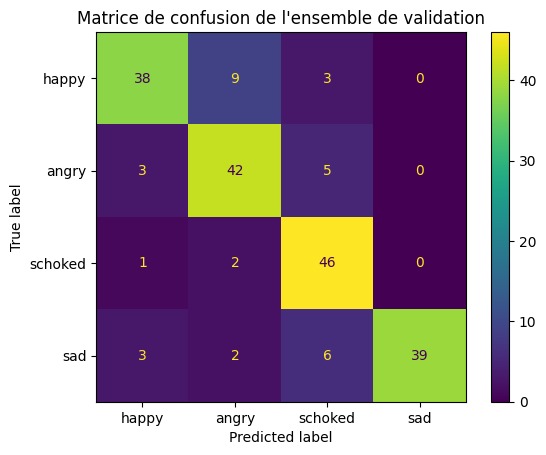

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 531ms/step


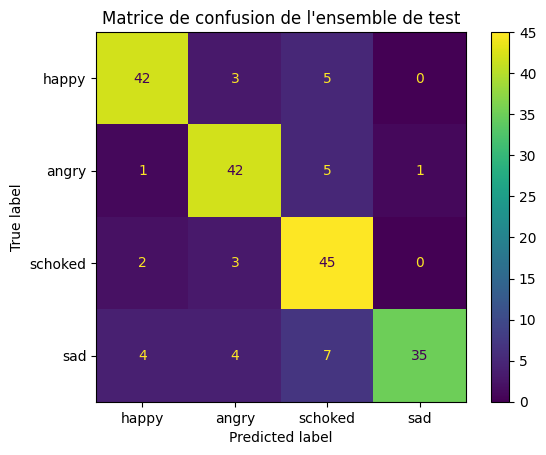

In [62]:
from sklearn import metrics
#Matrice de confusion de l'ensemble d'entrainement

y_train_pred = model.predict(x_train)
cm_train = metrics.confusion_matrix(y_train, np.expand_dims(np.argmax(y_train_pred, axis=1),1))
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = CLASSES)
cm_display_train.plot()
plt.title("Matrice de confusion de l'ensemble d'entrainement")
plt.show()

#Matrice de confusion de l'ensemble de validation
y_val_pred = model.predict(x_val)
cm_val = metrics.confusion_matrix(y_val, np.expand_dims(np.argmax(y_val_pred, axis=1),1))
cm_display_val = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = CLASSES)
cm_display_val.plot()
plt.title("Matrice de confusion de l'ensemble de validation")
plt.show()

#Matrice de confusion de l'ensemble de test
y_test_pred = model.predict(x_test)
cm_test = metrics.confusion_matrix(y_test, np.expand_dims(np.argmax(y_test_pred, axis=1),1))
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = CLASSES)
cm_display_test.plot()
plt.title("Matrice de confusion de l'ensemble de test")
plt.show()